In [61]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from obspy import read_inventory, read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, read, Trace


st1 = read("fdsnws-dataselect_2023-04-04t16_59_45z.mseed")

channels = ['BHZ']

# stream 
st1.filter(type='highpass', freq=0.1)
st1 = st.select(component='Z')
print(st)  

#trace 
tr1 = st1[0]
print(tr1)
print(tr1.stats) 
print(tr1.data)

1 Trace(s) in Stream:
IU.ANMO.00.BHZ | 2010-02-27T06:30:00.019538Z - 2010-02-27T10:29:59.969538Z | 20.0 Hz, 288000 samples
IU.ANMO.00.BHZ | 2010-02-27T06:30:00.019538Z - 2010-02-27T10:29:59.969538Z | 20.0 Hz, 288000 samples
         network: IU
         station: ANMO
        location: 00
         channel: BHZ
       starttime: 2010-02-27T06:30:00.019538Z
         endtime: 2010-02-27T10:29:59.969538Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 288000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 1243, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 636416})
[-47237 -47304 -47367 ... -27009 -27034 -27052]


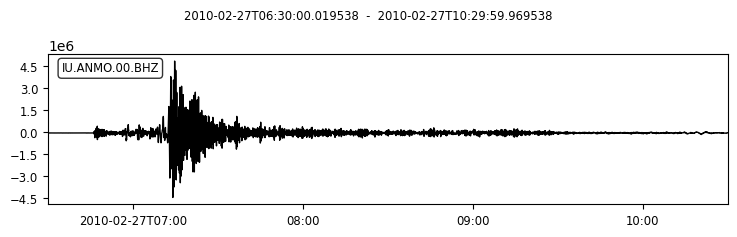

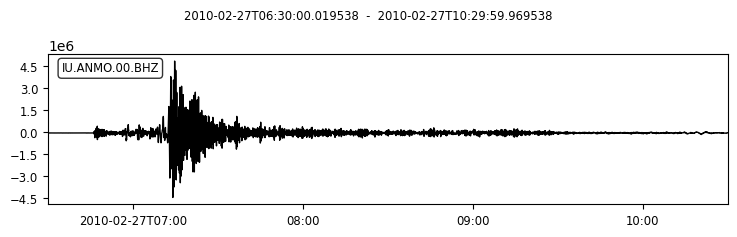

In [67]:
st1.plot()

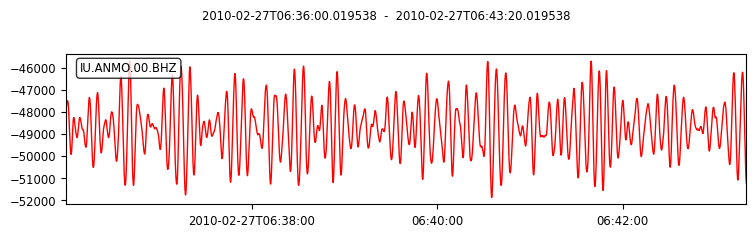

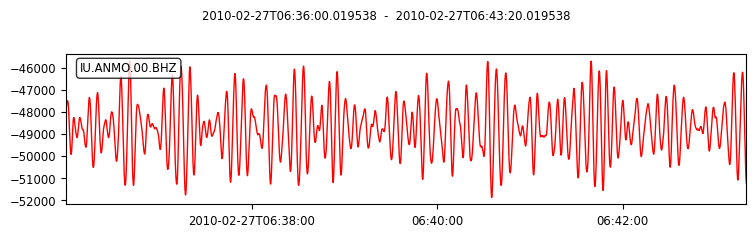

In [68]:
dt = st1[0].stats.starttime
st1.plot(color='red', tick_format='%I:%M %p',
                   starttime= dt + 360 , endtime= dt + 800)

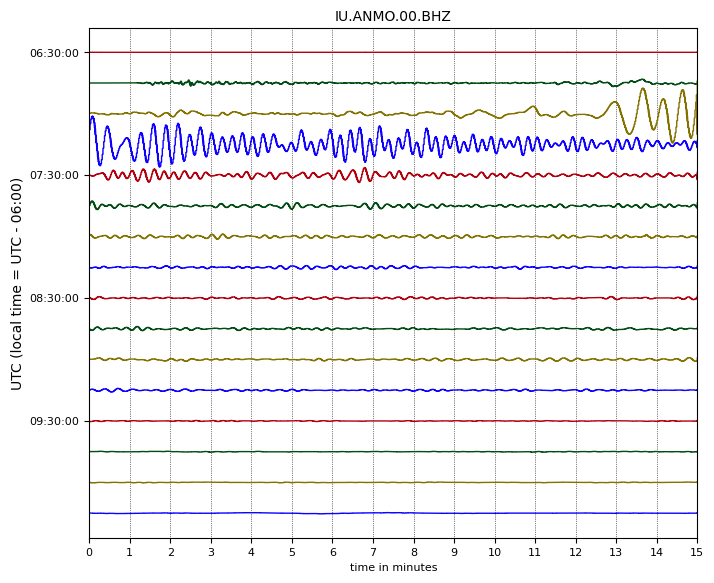

C:\Users\paige\anaconda3\lib\site-packages\obspy\imaging\waveform.py:506: UserWarning: Could not download the events because of 'FDSNNoServiceException: No FDSN services could be discovered at 'http://www.seismicportal.eu'. This could be due to a temporary service outage or an invalid FDSN service address.'.
  warnings.warn(msg)


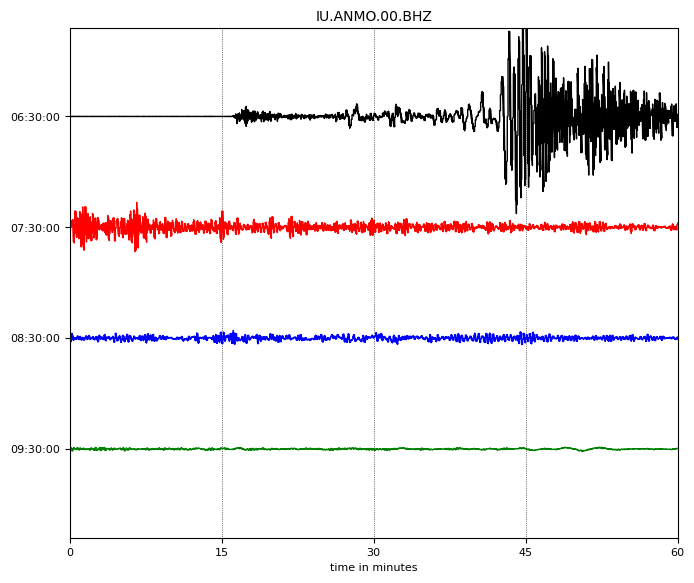

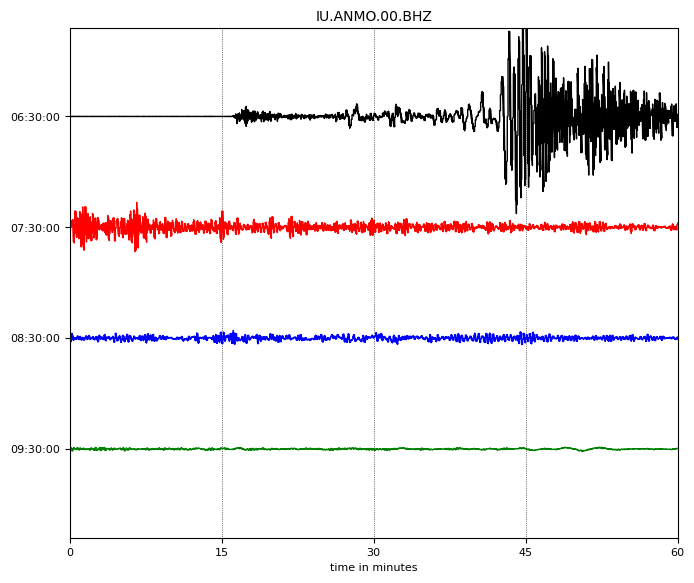

In [66]:
st1.plot(type='dayplot')

st1.plot(type="dayplot", interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e6, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

In [72]:
import numpy as np

# Read file into string
with open('dataless.xb.elyh0.2019.171.seed', 'r') as st2_file:
    st2_str = st2_file.read()

# Convert string to bytes
st2_bytes = st2_str.encode('latin-1')

# Convert to NumPy character array
data = np.frombuffer(st2_bytes, dtype='|S1')

# Fill header attributes
stats = {'network': 'BW', 'station': 'RJOB', 'location': '',
         'channel': 'WLZ', 'npts': len(data), 'sampling_rate': 0.1,
         'mseed': {'dataquality': 'D'}}


# set current time
stats['starttime'] = UTCDateTime()
st2 = Stream([Trace(data=data, header=stats)])
# write as ASCII file (encoding=0)
st2.write("st2.mseed", format='MSEED', encoding=0, reclen=256)

# Show that it worked, convert NumPy character array back to string
st2 = read("st2.mseed")

#trace 
tr2 = st2[0]
print(tr2)
print(tr2.stats) 
print(tr2.data)

BW.RJOB..WLZ | 2023-04-18T18:57:36.154444Z - 2023-04-29T16:38:46.154444Z | 0.1 Hz, 94208 samples
         network: BW
         station: RJOB
        location: 
         channel: WLZ
       starttime: 2023-04-18T18:57:36.154444Z
         endtime: 2023-04-29T16:38:46.154444Z
   sampling_rate: 0.1
           delta: 10.0
            npts: 94208
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 491, 'encoding': 'ASCII', 'byteorder': '>', 'record_length': 256, 'filesize': 125696})
[b'0' b'0' b'0' ... b' ' b' ' b' ']


ValueError: could not convert string to float: b'V'

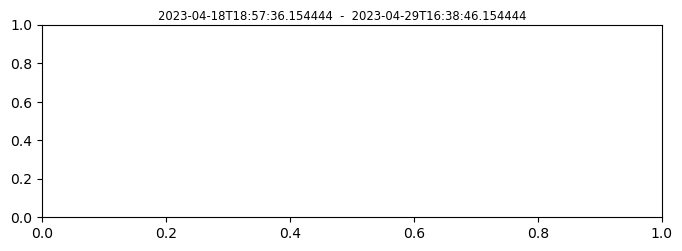

In [73]:
st2.plot()
dt = st2[0].stats.starttime
st2.plot(color='red', tick_format='%I:%M %p',
                   starttime= dt + 360 , endtime= dt + 800)

## Day Plots 

